# 2 Basic theory on ODE solvers

## Learning Objectives

At the end of this lecture you will be able to:
1. Define a simple solver to approximate solutions of ODEs based on Taylor Series
2. Quantify the numerical error of an approximated solution

# 2.1 Introduction

Let's assume that we want to find an analytical expression of a function that describes the displacement an object in time, denoted as $ u(t) $. For simplicity, we assume that this object only has one degree of freedom (DOF), *e.g.* the vertical displacement of the centre of gravity of a floating vessel. We also assume that the object satisfies the equation of motion given by a linear mass-damping-stiffness system:

$$ m\ddot{u}(t)+c\dot{u}(t)+ku(t)=F(t), $$

with $m$ the mass of the object, $c$ the damping and $k$ the stiffness. $ F(t) $ is a time-dependent forcing term. We also provide appropriate initial conditions, in that case 
$$ u(0)=0,\quad\dot{u}(0)=\dot{u}_0. $$

In General, and mostly depending on the complexity of the forcing term $ F(t) $, it is difficult to find an analytical expression that is defined at all times, $u(t)\, ∀ t\in[0,\infty)$, see red curve in the following figure.

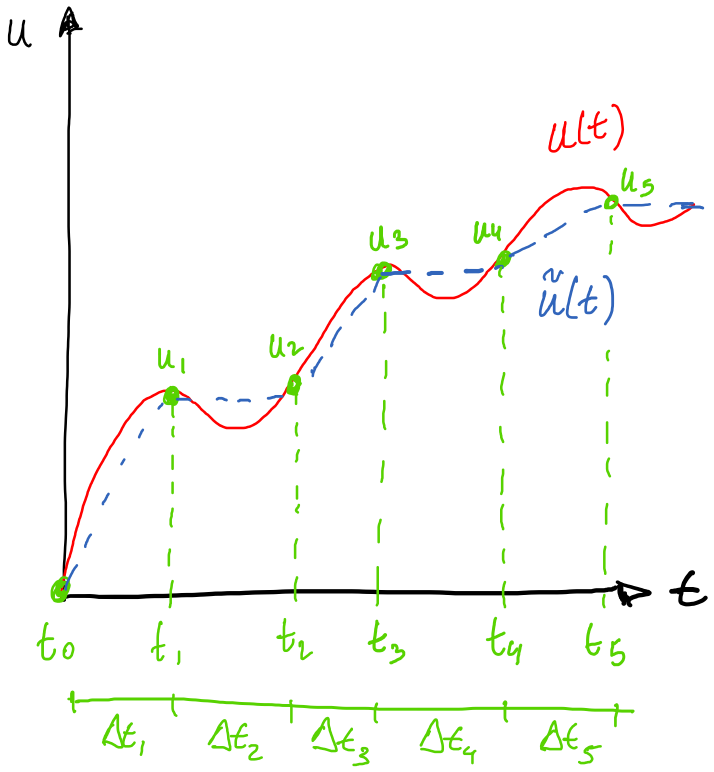

Instead, we might be interested in knowing the value of the function at specific points in time, $u(t_0),u(t_1),u(t_2),...,u(t_N)$, see green dots in the previous figure. From these set of values, one can reconstruct an approximated function $\tilde{u}_N(t)$ by, for instance, using a linear interpolation between points (blue dashed line in the figure).

For smooth enough functions, $u(t)$, as we increase the number of evaluation points in time, $N$, the approximated solution solution $\tilde{u}_N(t)$ will be closer to $u(t)$.

> **Important!**
>
> In this course we will learn how to find approximate solutions like $\tilde{u}_N(t)$ by using numerical methods. 

## Notation
In these notes we will use the following notation: 
* $u_i:=u(t_i)$, the function evaluated at time $t_i$. 
* $\Delta t_i:=t_i-t_{i-1}$, the time step between two consecutive time steps, $t_{i-1}$ and $t_i$.
When considering constant time steps, in an interval of time $t\in[0,T]$ with $N$ time steps, the time step size will be $\Delta t=T/N$.

# 2.2 Taylor Series

Before going into more details on how to find a numerical approximation, let's start by refreshing some theory about **[Taylor series](https://en.wikipedia.org/wiki/Taylor_series)**. As one can find in the Wikipedia page:

> the **Taylor series** of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point.

That is $$f(x)=\sum_{i=0}^\infty\frac{f^{(i)}(a)}{i!}(x-a)^i.$$

The series is exact for an arbitrary function as long as we include infinite terms in the sum. However, here we are interested on an approximation that includes only the first $r$ terms of the expansion: $$ f_r(x)=\sum_{i=0}^r\frac{f^{(i)}(a)}{i!}(x-a)^i\approx f(x). $$

Let's see how this work in a practical example. We consider here the function $f(x)=\sin(x)$ and we want to approximate this function knowing the function value and its derivatives at the point $a=0$. Using five terms in the expansion, $r=5$, we have that 
$$\begin{align*}f_5(x) &= \sin(0) + x\cos(0) - \frac{x^2}{2}\sin(0) - \frac{x^3}{6}\cos(0) + \frac{x^4}{24}\sin(0) + \frac{x^5}{120}\cos(0)\\
                      &= x - \frac{x^3}{6} + \frac{x^5}{120}.
\end{align*} $$

We now can do a first coding exercise with this example and see how this approximation looks like for different values of $r$. To do so, we explicitly define the approximated functions.

Lets first import some useful packages:

In [2]:
pip install ipympl;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 19.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

We define a set of functions $f_r(x)$ with $r$ the number of terms in the Taylor expansion.

In [15]:
a=0.0
def f(x):
    return np.sin(x)
def f0(x):
    return np.sin(a) + 0.0*x # trick to get a result with same dimensions of x
def f1(x):
    return f0(x) + (x-a)*np.cos(a)
def f2(x):
    return f1(x) - ((x-a)**2)/2*np.sin(a)
def f3(x):
    return f2(x) - ((x-a)**3)/6*np.cos(a)
def f4(x):
    return f3(x) + ((x-a)**4)/24*np.sin(a)
def f5(x):
    return f4(x) + ((x-a)**5)/120*np.cos(a)

Let's do a sanity check:

In [16]:
f5(0.1) == 0.1 - (0.1**3)/6 + (0.1**5)/120

True

And we plot them. Here we use the package [matplotlib](https://matplotlib.org/stable/index.html).

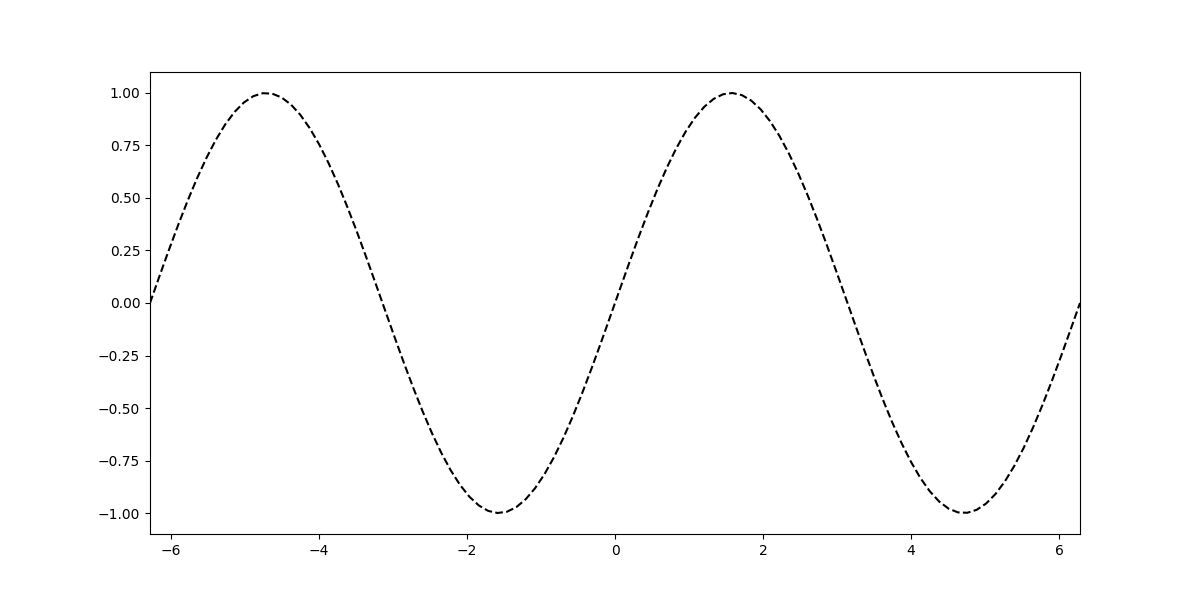

In [18]:
x = np.linspace(-2*math.pi,2*math.pi,100)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x,f(x), '--', color='black', label='sin(x)')
plt.xlim([-2*math.pi, 2*math.pi])
plt.show()

How do the approximated function $f_r(x)$ behave when increasing $r$?

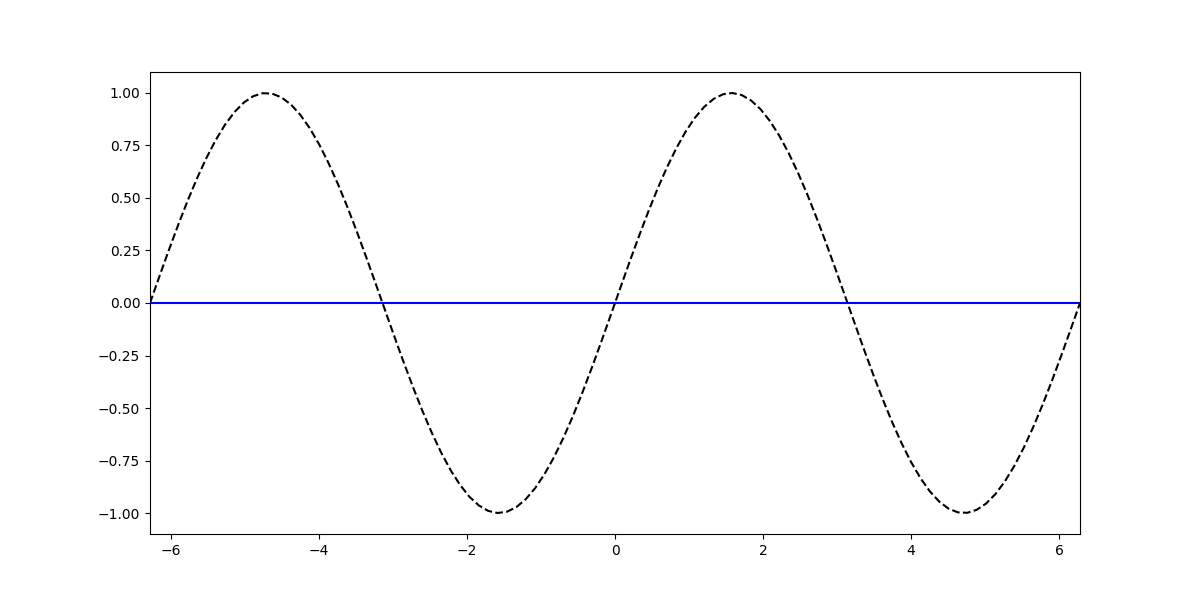

In [19]:
ax.plot(x,f0(x), '-', color='blue', label='f0(x)')
plt.show()

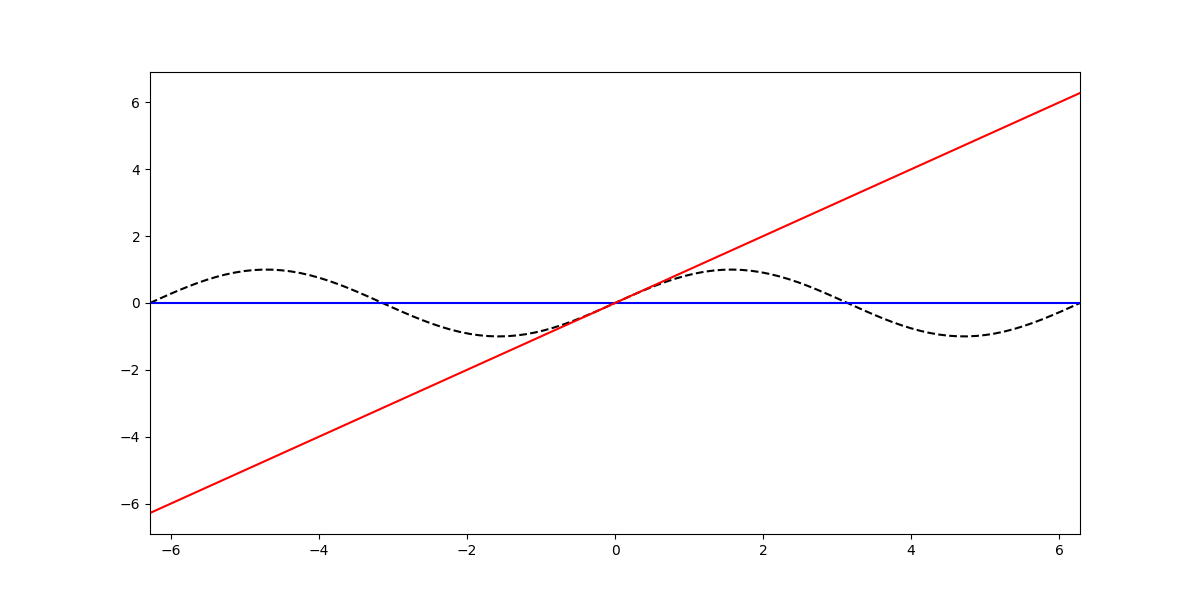

In [20]:
ax.plot(x,f1(x), '-', color='red', label='f1(x)')
plt.show()

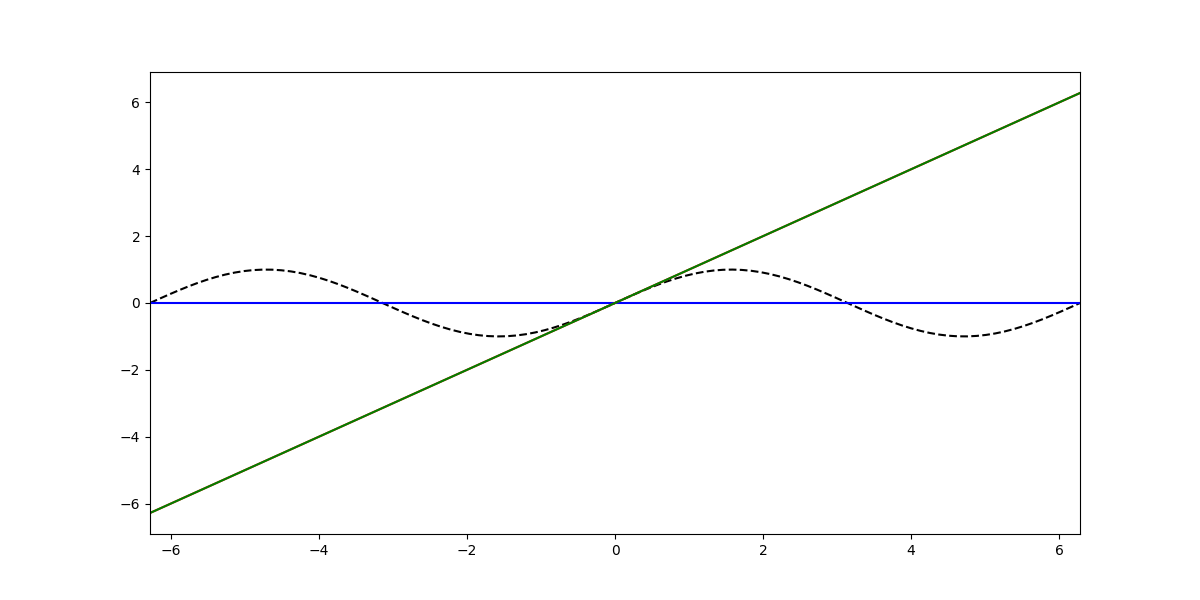

In [21]:
ax.plot(x,f2(x), '-', color='green', label='f2(x)')
plt.show()

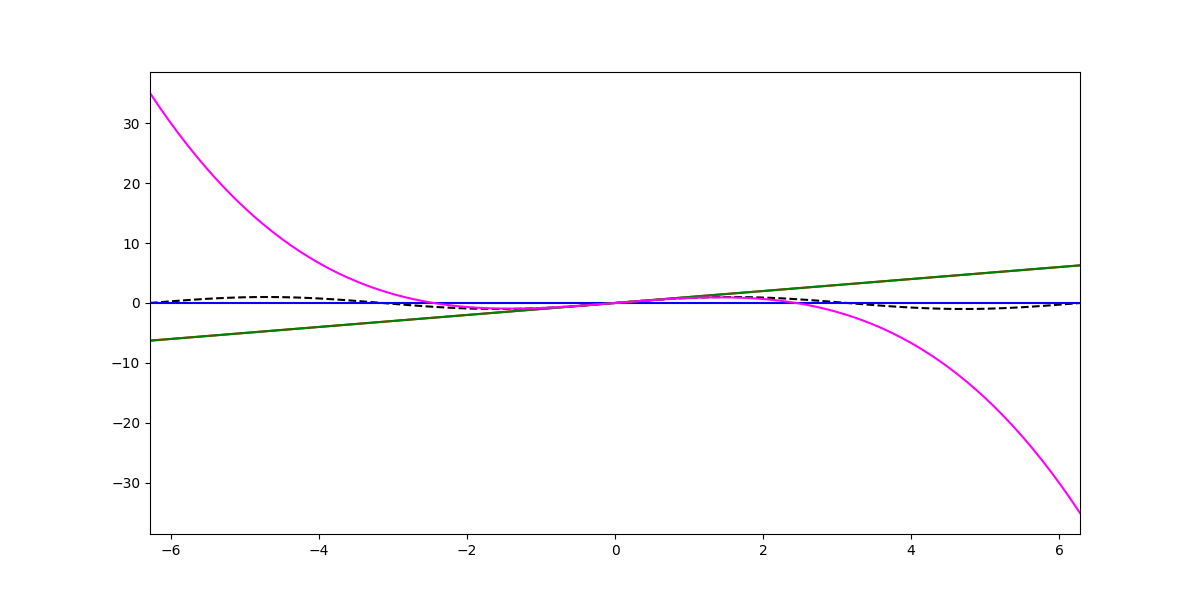

In [22]:
ax.plot(x,f3(x), '-', color='magenta', label='f3(x)')
plt.show()

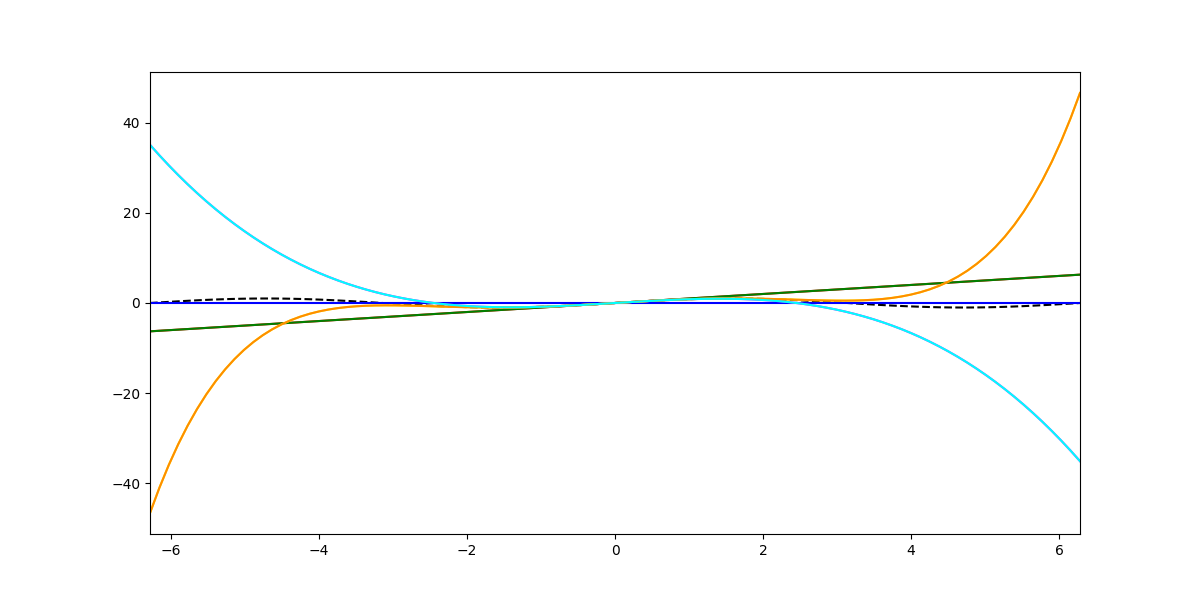

In [26]:
ax.plot(x,f4(x), '-', color='cyan', label='f4(x)')
plt.show()

In [ ]:
ax.plot(x,f5(x), '-', color='darkorange', label='f5(x)')
plt.show()

We see that as we increase the number of terms, the approximation gets closer to the analytical expression. Note also that for this particular example, there is no gain for $r=2$ and $r=4$ with respect to $r=1$ and $r=3$. This is caused by the fact that $\sin(a)=0$ at the approximation point $a=0$.

We can go further and evaluate and plot the error of the approximation for different values of $m$.
$$ e_m(x)=|f(x)-f_m(x)|,\qquad r=1,...,5$$

In [ ]:
def e0(x):
    return abs(f(x)-f0(x))
def e1(x):
    return abs(f(x)-f1(x))
def e2(x):
    return abs(f(x)-f2(x))
def e3(x):
    return abs(f(x)-f3(x))
def e4(x):
    return abs(f(x)-f4(x))
def e5(x):
    return abs(f(x)-f5(x))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x,e0(x), '-', color='blue', label='e0(x)')
ax.plot(x,e1(x), '-', color='red', label='e1(x)')
ax.plot(x,e2(x), '-', color='green', label='e2(x)')
ax.plot(x,e3(x), '-', color='magenta', label='e3(x)')
ax.plot(x,e4(x), '-', color='cyan', label='e4(x)')
ax.plot(x,e5(x), '-', color='darkorange', label='e5(x)')
plt.xlim([-2*math.pi, 2*math.pi])
plt.show()


As it is seen in the previous figure, close to the evaluation point $a$, the approximation error decreases as we increase the number of terms in the expansion.

> **Now we know...**
>
> * How to approximate a function using a **Taylor series**
> * That the approximation error is introduced when truncating the series to $r$ finite terms
> * How to compute and plot the Taylor series approximation and error of a simple function

### Exercise
Find an approximated value of $e^{0.2}$ using a Taylor expansion of 4 terms.

*Solution: $e^{0.2}\approx 1.2213$*

In [ ]:
# Your code goes here

# 2.2 Approximating ODEs with Taylor Series

We have seen that to approximate a function using Taylor series (TS), we just need the value of the function and its derivatives at a point. We now can use this tool to approximate the solution of ODEs. 

Let's consider the linear mass-damping-stiffness system defined in the introduction:
$$ m\ddot{u}(t)+c\dot{u}(t)+ku(t)=F(t), $$
with appropriate initial conditions at $t=t_0$
$$ u(t_0)=u_0,\quad\dot{u}(t_0)=\dot{u}_0. $$

Here, we want to find the expression of a TS approximation of $u(t)$ around a point in time $t^*$. That is

$$ u(t)\approx\tilde{u}(t)=\sum_{i=0}^r\frac{u^{(i)}(t^*)}{i!}(x-t^*)^i. $$

Using $r=2$, this expression simplifies to

$$ \tilde{u}(t)=u(t^*) + \dot{u}(t^*)(t-t^*) + \frac{1}{2}\ddot{u}(t^*)(t-t^*)^2. $$

The issue here is that in order to get the expression of $ \tilde{u}(t) $, we first need the values $u(t^*)$, $\dot{u}(t^*)$ and $\ddot{u}(t^*)$ for a given $t^*$. If we select $t^*=t_0$, we can use the initial conditions, i.e. $u(t^*)=u(t_0)=u_0$ and $\dot{u}(t^*)=\dot{u}(t_0)=\dot{u}_0$. Moreover, from the equation of motion, we can obtain the value for $\ddot{u}(t^*)=\ddot{u}(t_0)=\frac{1}{m}(F(t_0)-ku_0-c\dot{u}_0)$. Therefore, the appoximated solution $\tilde{u}_1=\tilde{u}(t_1)$ at time $t_1=t_0+Δ t$ will read
$$ \tilde{u}_1=u_0 + \Delta t\dot{u}_0 + \frac{\Delta t^2}{2}\ddot{u}_0. $$

As seen previously, the quality of the approximation depends on how far $t_1$ is from $t_0$, that is how large $\Delta t$ is. This means that reducing $\Delta t$ we will get a better approximation of $u$. Assuming that $\tilde{u}_1$ is a good enough approximation of $u(t_1)$ and simplifying notation, hereinafter we will use $u_1$ instead of $\tilde{u}_1$. 

Now, we are not just interested in finding $u(t_1)$ for a $t_1$ close enough to $t_0$, but we want to find $u(t)$ for any $t\in[t_0,T]$. Let's see what happens if we apply the same process at $t_2=t_1 + \Delta t$:
$$ \tilde{u}_2=u_1 + \Delta t\dot{u}_1 + \frac{\Delta t^2}{2}\ddot{u}_1. \label{u2}$$

In this expression we need $u_1$, which is known, $\dot{u}_1$, which is unknown, and $\ddot{u}_1$, that is also unknown. From the equation of motion, we can get the value of $\ddot{u}_1$ in terms of $u_1$ and $\dot{u}_1$
$$\ddot{u}_1=f(u_1,\dot{u}_1)=\frac{1}{m}(F(t_1)-ku_1-c\dot{u}_1).\label{ddotu1}$$

However, we still have $\dot{u}_1$ as an unknown in \eqref{u2}. Let's try to approximate it using a TS again with $r=2$ terms:
$$\dot{u}_1=\dot{u}_0+\Delta t\ddot{u}_0+\frac{\Delta t^2}{2}\frac{d^3u_0}{dt^3}. \label{dotu1}$$

The problem now with equation \eqref{dotu1} is that we don't have the initial value of the third derivative in time $\frac{d^3u_0}{dt^3}$. Alternatively, we can use an approximation using a TS with $r=1$, leading to 
$$\dot{u}_1=\dot{u}_0+\Delta t\ddot{u}_0.\label{dotu1_}$$

Thus, we can obtain an approximation of $u_2$ in terms of $u_1$, $\dot{u}_1$ and $\ddot{u}_1$ that are known. This process can be generalized to an arbitrary number of steps. Let's assume that we discretize the time in $N$ equally distributed time points, $[t_0,t_1,t_2,...,t_N]$, where $t_i=i\Delta t$. Knowing the solution and its first time derivative at time $t_{i-1}$, we can find the solution at $t_i$ by

---
**Algorithm**
1. Get the value of the second time derivative from the equation of motion: $$\ddot{u}_{i-1}=\frac{1}{m}(F(t_{i-1})-ku_{i-1}-c\dot{u}_{i-1}).\label{approx_ddotu}$$
2. Update the solution at $t_i$: $$u_i=u_{i-1} + \Delta t\dot{u}_{i-1} + \frac{\Delta t^2}{2}\ddot{u}_{i-1}.\label{approx_u}$$
3. Update the first time derivative at $t_i$: $$\dot{u}_i=\dot{u}_{i-1}+\Delta t\ddot{u}_{i-1}.\label{approx_dotu}$$
---

# 2.3 Truncation Error

## Local truncation error

Since we have used a finite number or terms $m$ in the Taylor expansion, the approximated solution will not be exact. But, can we get a better understanding of this error? 

Let's look more carefully at the approximations that we did in the previous section. Assuming that we can obtain an exact solution and its derivatives at $t_{i-1}$, the approximated exact value at $t_i$ can be expressed as
$$u_i = \underbrace{\sum_{j=0}^r\frac{u_{i-1}^{(j)}}{j!}\Delta t^j}_{\tilde{u}_i} + \underbrace{\sum_{j=m+1}^\infty\frac{u_{i-1}^{(j)}}{j!}\Delta t^j}_{\epsilon_i}.$$

We see that the approximation error is
$$\epsilon_i=|u_i-\tilde{u}_i|=\left|\sum_{j=m+1}^\infty\frac{u_{i-1}^{(j)}}{j!}\Delta t^j\right|,$$
which depends on the function derivatives' with order $j$ multiplied by the time step to the power $j$, with $m < j < \infty$. As we decrease $\Delta t$, the decrease of the error will be governed by the lowest exponent in the sum, that is $\Delta t^{m+1}$. Therefore, we say that the approximation will have a **local truncation error** that convergenes with a rate of $m+1$. The error between step $i$ and $i-1$ will be of the order of $\Delta t^{m+1}$:
$$\epsilon_i\sim\mathcal{O}(\Delta t^{m+1}).$$

Then, the approximations introduced in (1.2.11) and (1.2.12) will have a local truncation error of order
$$ \begin{align*}\epsilon_{u_i}&\sim\mathcal{O}(\Delta t^3),\\
                \epsilon_{\dot{u}_i}&\sim\mathcal{O}(\Delta t^2).
\end{align*} $$

Hence, at time $t_{i+1}$, the numerical error introduced in equation \eqref{approx_ddotu} will be governed by the error of $u_i$, i.e. $\epsilon_{u_i}\sim\mathcal{O}(\Delta t^3)$, and the error of $\dot{u}_i$, i.e. $\epsilon_{\dot{u}_i}\sim\mathcal{O}(\Delta t^2)$. 

Let's take a closer look at what does this mean. The error at the first time step ($i=1$), for a given time step size $\Delta t^*$, will be governed by the first neglected term in the truncated series, *i.e.* $\epsilon_{u_1}({\Delta t^*})\sim\frac{u_{0}^{(3)}}{6}{\Delta t^*}^3$ and $\epsilon_{\dot{u}_1}({\Delta t^*})\sim\frac{\dot{u}_{0}^{(2)}}{2}{\Delta t^*}^2$. What would happen if we reduce the time step size by $10$?
$$\frac{\epsilon_{u_1}({\Delta t^*})}{\epsilon_{u_1}({\Delta t^{**}})}\sim\frac{\frac{u_{0}^{(3)}}{6}{\Delta t^*}^3}{\frac{u_{0}^{(3)}}{6}{\Delta t^{**}}^3}=\frac{1}{10^3},\qquad \frac{\epsilon_{\dot{u}_1}({\Delta t^*})}{\epsilon_{\dot{u}_1}({\Delta t^{**}})}\sim\frac{\frac{\dot{u}_{0}^{(2)}}{2}{\Delta t^*}^3}{\frac{\dot{u}_{0}^{(2)}}{2}{\Delta t^{**}}^2}=\frac{1}{10^2}.$$

Therefore, $\epsilon_{\ddot{u}_i}\sim\mathcal{O}(\Delta t^2)$, since the second order convergence of $\dot{u}_i$ will dominate over the third order error of $u_i$. In that case, we don't need a third order accurate scheme ($r=2$) for $u_i$, a TS with $r=1$ (sedond order) will result in the same accuracy for $\ddot{u}_i$ and we avoid the evaluation of the term $\frac{\Delta t^2}{2}\ddot{u}_{i-1}$.

The final scheme, equivalent to the [**Forward Euler**](https://en.wikipedia.org/wiki/Euler_method) method for second order ODEs, is defined by the following steps: 

---
**Forward Euler Method**
1. Get the value of the second time derivative from the equation of motion: $$\ddot{u}_{i-1}=\frac{1}{m}(F(t_{i-1})-ku_{i-1}-c\dot{u}_{i-1}).\label{approx_ddotu_FE}$$
2. Update the solution at $t_i$: $$u_i=u_{i-1} + \Delta t\dot{u}_{i-1}.\label{approx_u_FE}$$
3. Update the first time derivative at $t_i$: $$\dot{u}_i=\dot{u}_{i-1}+\Delta t\ddot{u}_{i-1}.\label{approx_dotu_FE}$$
---
## Global truncation error

We have seen that the local truncation error of the Forward Euler method is second order, meaning that at every step $i$ for $i=1,...,N$ we will introduce an error of $\mathcal{O}(\Delta t^2)$. Therefore, after $N$ time steps, the global truncation error will be
$$\epsilon_{u_N}\sim N\mathcal{O}(\Delta t^2)=\frac{T}{\Delta t}\mathcal{O}(\Delta t^2)\sim\mathcal{O}(\Delta t).$$

This leads to a first order convergence rate for the global truncation error of the Forward Euler method. 

> **Now we know...**
> 
> * How to quantify the convergence rate of the local truncation error in a truncated **Taylor series**
> * How to quantify the convergence rate of the global truncation error of a scheme.
> * That the this truncation error will afect the order (or convergence rate) of an ODE solver
> * How to define the **Forward Euler** method